# Number of batch (batch size=16) for each subset
Subset | Num_batch
--- | ---
2 | 69
5 | 170
10 | 333
20 | 666
40 | 1330
60 | 2023
80 | 2690
100 | 3370

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
phy = pd.DataFrame(columns=['PSNR', 'SSIM', 'MSE', 'H1', 'Train+Val time (minutes)'])
no_phy = pd.DataFrame(columns=['PSNR', 'SSIM', 'MSE', 'H1', 'Train+Val time (minutes)'])

In [14]:
phy.loc[2] = 27.698170159312514,0.7808334120491675,0.03491706332164134,50.216907022906135, 204.08
no_phy.loc[2] = 24.528395977520248,0.6713362337724,0.043233287846358916,57.25518374599654, 212.24

phy.loc[5] = 30.163410442500137,0.8291481499478761,0.023871529525555383,34.31176010501838, 226.88
no_phy.loc[5] = 26.997603906377652,0.7632220420782231,0.02983763961395621,39.14613885640029, 221.88

phy.loc[10] = 31.813709381397285,0.8608085285719435,0.021897666516239235,31.99104535136833, 249.33
no_phy.loc[10] = 28.723993267062674,0.8133798946397421,0.023052120184792087,32.372204824094375, 245.44

phy.loc[20] = 34.78677507704569,0.9430665585816198,0.006761202215650202,11.326713000229017, 315.12
no_phy.loc[20] = 30.702257757905763,0.8710920072089291,0.01440335867439503,22.355921638989816, 324.21

phy.loc[40] = 35.46569352812021,0.9500868403147562,0.006677186999730684,10.91664676410475, 449.72
no_phy.loc[40] = 31.98924285501604,0.9052844110417961,0.011050501899152292,17.802142635958987, 415.55

phy.loc[60] = 36.54035467319831,0.9584413319807437,0.004667208390626363,8.205895058357372, 540.99
no_phy.loc[60] = 32.70724028098483,0.9119350467357076,0.010239368591229415,17.074519578558924, 526.46

phy.loc[80] = 36.4882803148657,0.958638889306943,0.004543519582357408,8.238427216430317, np.nan
no_phy.loc[80] = 32.65510422555772,0.9084563909742593,0.011240394148237425,18.836875988313714, np.nan

phy.loc[100] = 37.27479402558142,0.9651788410781005,0.00405540733345567,7.237192213714728, np.nan
no_phy.loc[100] = 32.44001455102469,0.9083833506067559,0.01110022178424288,18.14477053597181, np.nan

In [15]:
print('Physics:\n', phy)
print('\nNo Physics:\n', no_phy)

Physics:
           PSNR      SSIM       MSE         H1  Train+Val time (minutes)
2    27.698170  0.780833  0.034917  50.216907                    204.08
5    30.163410  0.829148  0.023872  34.311760                    226.88
10   31.813709  0.860809  0.021898  31.991045                    249.33
20   34.786775  0.943067  0.006761  11.326713                    315.12
40   35.465694  0.950087  0.006677  10.916647                    449.72
60   36.540355  0.958441  0.004667   8.205895                    540.99
80   36.488280  0.958639  0.004544   8.238427                       NaN
100  37.274794  0.965179  0.004055   7.237192                       NaN

No Physics:
           PSNR      SSIM       MSE         H1  Train+Val time (minutes)
2    24.528396  0.671336  0.043233  57.255184                    212.24
5    26.997604  0.763222  0.029838  39.146139                    221.88
10   28.723993  0.813380  0.023052  32.372205                    245.44
20   30.702258  0.871092  0.014403  22.3

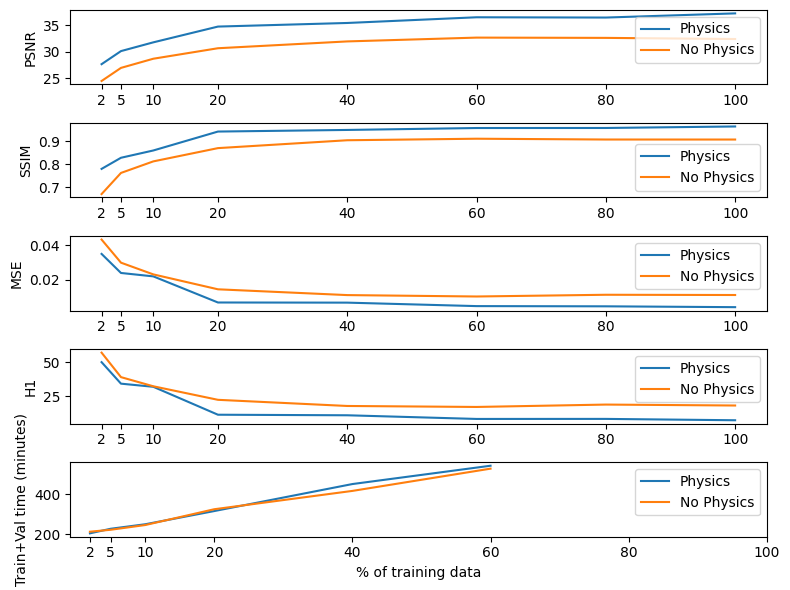

In [16]:
fig, axs = plt.subplots(nrows=len(phy.columns), ncols=1, figsize=(8, 6))

for i, column in enumerate(phy.columns):
    axs[i].plot(phy[column], label='Physics')
    axs[i].plot(no_phy[column], label='No Physics')
    axs[i].set_ylabel(column)
    axs[i].set_xticks(phy.index, phy.index.astype(str))  # Set xticks to index values
    axs[i].legend()

plt.xlabel('% of training data')
plt.tight_layout()
plt.show()


In [1]:
# TODO: alter the axes to focus on the scores vs data

# Check loading error

In [ ]:
import numpy as np
import os

In [ ]:
mesh_path = '../data/Allen-Cahn_Periodic/Subset80/train/mesh_7/'
for param_path in os.listdir(mesh_path):
    for file in os.listdir(mesh_path + param_path):
        try:
            data = np.load(mesh_path + param_path + '/' + file)
        except Exception as e:
            print('Error: ' + param_path + '/' + file)
            continue

# Number of files

In [36]:
import os

In [37]:
def get_file_count(directory):
    count = 0
    for param_dir in os.listdir(directory):
            count += len(os.listdir(os.path.join(directory, param_dir)))
    return count

In [42]:
def train_val_test_count(dataset):
    train = os.path.join(dataset, 'train/mesh_7')
    val = os.path.join(dataset, 'validation/mesh_7')
    test = os.path.join(dataset, 'test/mesh_7')

    train_count = get_file_count(train)
    val_count = get_file_count(val)
    test_count = get_file_count(test)
    total = train_count + val_count + test_count
    
    print(dataset)
    print('Train & Validation & Test & Total')
    print(train_count, '&', val_count, '&', test_count, '&', total, '\n')

In [43]:
train_val_test_count('../data/Allen-Cahn_Periodic')
train_val_test_count('../data/Allen-Cahn_Neumann')
train_val_test_count('../data/Erikson_Johnson')

../data/Allen-Cahn_Periodic
Train & Validation & Test & Total
55062 & 9065 & 7973 & 72100 

../data/Allen-Cahn_Neumann
Train & Validation & Test & Total
15732 & 2590 & 2278 & 20600 

../data/Erikson_Johnson
Train & Validation & Test & Total
51875 & 8494 & 7352 & 67721 



# Derrivative plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from physics import calculate_image_derivative, remove_boundary
import torch

In [ ]:
mesh = np.load('../data/RDA/validation/mesh_63/eps10_K0_r0_theta0/u_n000138.npy')

In [ ]:
mesh_tensor = torch.tensor(mesh, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print('mesh_tensor shape', mesh_tensor.shape)

mesh_dx, mesh_dy = calculate_image_derivative(mesh_tensor)
mesh_dx = mesh_dx.squeeze(0).squeeze(0)
mesh_dy = mesh_dy.squeeze(0).squeeze(0)
print('mesh_dx shape', mesh_dx.shape)
print('mesh_dy shape', mesh_dy.shape)

mesh_tensor = remove_boundary(mesh_tensor)
print('After removing boundary, mesh_tensor shape', mesh_tensor.shape)
mesh_tensor = mesh_tensor.squeeze(0).squeeze(0)
print('Final mesh_tensor shape', mesh_tensor.shape)

mesh_tensor shape torch.Size([1, 1, 64, 64])
mesh_dx shape torch.Size([62, 62])
mesh_dy shape torch.Size([62, 62])
After removing boundary, mesh_tensor shape torch.Size([1, 1, 62, 62])
Final mesh_tensor shape torch.Size([62, 62])


(-0.5, 61.5, 61.5, -0.5)

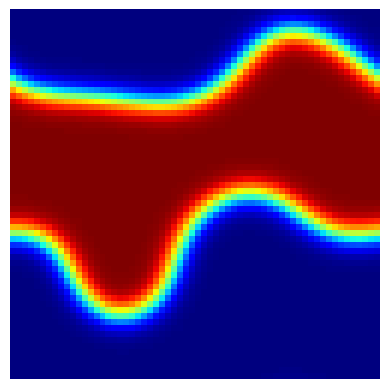

In [ ]:
plt.imshow(mesh_tensor.numpy(), cmap='jet')
plt.axis('off')

(-0.5, 61.5, 61.5, -0.5)

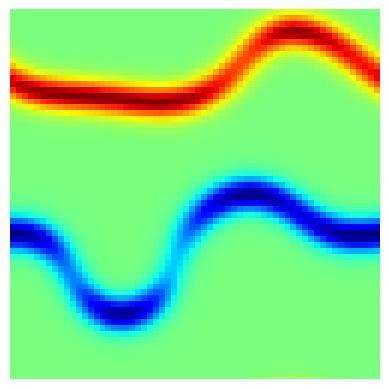

In [ ]:
plt.imshow(mesh_dx.numpy(), cmap='jet')
plt.axis('off')

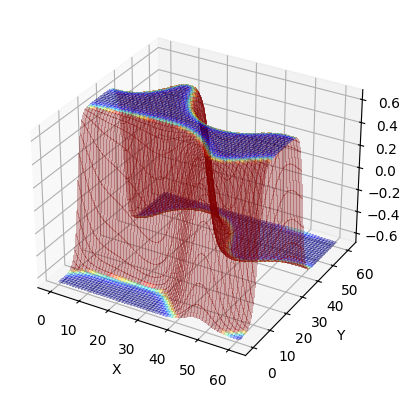

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = np.arange(mesh_tensor.shape[0])
y = np.arange(mesh_tensor.shape[1])
X, Y = np.meshgrid(x, y)

magnitude = torch.sqrt(mesh_dx**2 + mesh_dy**2)
Z = mesh_tensor.numpy()

ax.plot_surface(X, Y, Z, facecolors=plt.cm.jet(magnitude.numpy()), rstride=1, cstride=1, antialiased=False, shade=False, linewidth=0, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()


# Getting best epoch

In [8]:
import torch

In [9]:
checkpoint = torch.load("../results/RDA_inner_1e-8_boundary_5_BDF/g_best.pth.tar", map_location=lambda storage, loc: storage)

checkpoint["epoch"]


94

In [10]:
checkpoint = torch.load("../results/RDA_no_physics/g_best.pth.tar", map_location=lambda storage, loc: storage)

checkpoint["epoch"]


65

# Data Cleaning

In [ ]:
import os

In [ ]:
import os
dir_path = '../data/RDA/train/mesh_7'
for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file.endswith('.npy') and file.startswith('u_n') and int(file.split('.')[0].split('u_n')[1]) <= 46:
            print('Removing', os.path.join(root, file))
            os.remove(os.path.join(root, file))
    
